In [1]:
#Import library yang ingin digunakan
import pandas as pd #data processing
import numpy as np #operasi matematika dan linear aljebra
import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns #visualisasi data
import statsmodels.api as sm #time series analisis

Analisis Data Time Series dengan Pola Data Stasioner

Load Dataset

In [96]:
#import dataset
# Uncomment the following lines if you haven't mount to your drive. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# loading data with pandas read_csv
data = pd.read_csv('E:/inflasi.csv',sep=";")

In [3]:
data

,Time,Inflasi
0,01-1990,0.92
1,02-1990,0.99
2,03-1990,-0.40
3,04-1990,1.12
4,05-1990,0.86
...,...,...
350,03-2019,0.11
351,04-2019,0.44
352,05-2019,0.68
353,06-2019,0.55


Cek Data Type

In [4]:
data.dtypes

Time        object
Inflasi    float64
dtype: object

In [5]:
data["Time"]=pd.to_datetime(data["Time"],format="%m-%Y")

In [6]:
data.dtypes

Time       datetime64[ns]
Inflasi           float64
dtype: object

Membuat plot time series

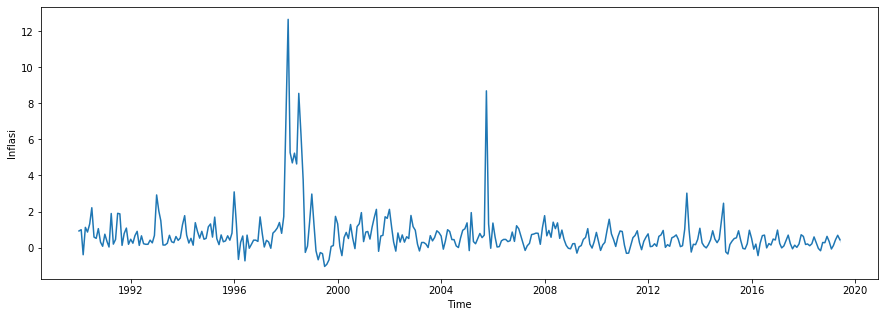

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["Inflasi"])

Cek stasioneritas data dengan ADF Test

In [8]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['Inflasi'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -5.751126e+00
p-value                        5.963142e-07
#Lags Used                     7.000000e+00
Number of Observations Used    3.470000e+02
Critical Value (1%)           -3.449337e+00
Critical Value (5%)           -2.869906e+00
Critical Value (10%)          -2.571227e+00
dtype: float64


Single Exponential Smoothing

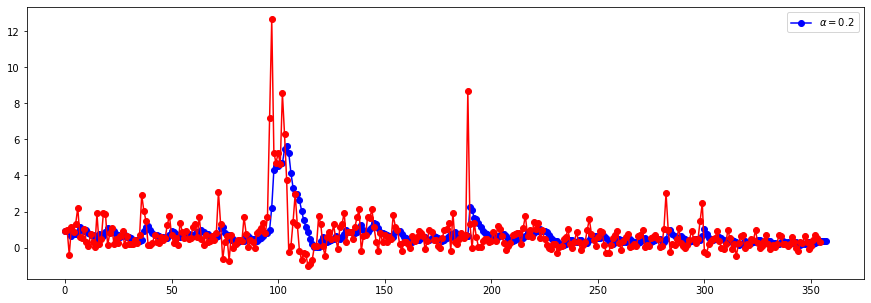

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
plt.figure(figsize=(15,5))
#menggunakan alfa=0.2
fit1 = SimpleExpSmoothing(data['Inflasi']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')


data['Inflasi'].plot(marker='o', color='red')
plt.show()

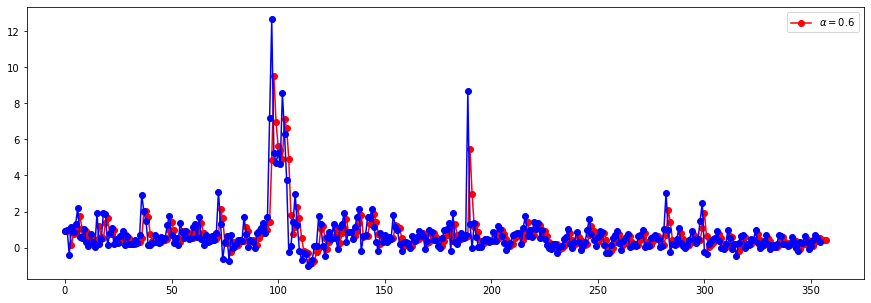

In [10]:
plt.figure(figsize=(15,5))
#menggunakan alfa=0.6
fit2 = SimpleExpSmoothing(data['Inflasi']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

data['Inflasi'].plot(marker='o', color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


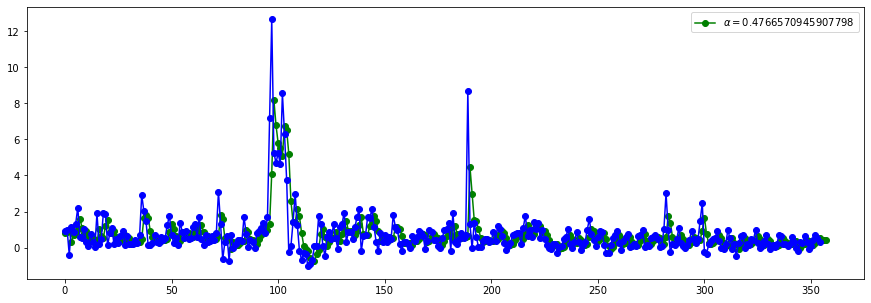

In [12]:
plt.figure(figsize=(15,5))
#menggunakan alfa dioptimasi
fit3 = SimpleExpSmoothing(data['Inflasi']).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

data['Inflasi'].plot(marker='o', color='blue')
plt.show()

In [13]:
#Evaluasi menggunakan MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(data["Inflasi"],fit1.fittedvalues))
print(mean_squared_error(data["Inflasi"],fit2.fittedvalues))
print(mean_squared_error(data["Inflasi"],fit3.fittedvalues))

1.232826032018704
1.1350429426043733
1.1258318923665134


In [15]:
#Forecast
Forecast_SES=pd.DataFrame({"Alpha:0.2":fcast1,"Alpha:0.6":fcast2,"Alpha:optimize":fcast3})
Forecast_SES

,Alpha:0.2,Alpha:0.6,Alpha:optimize
355,0.362292,0.402938,0.413753
356,0.362292,0.402938,0.413753
357,0.362292,0.402938,0.413753


AR, MA, ARMA

ACF dan PACF

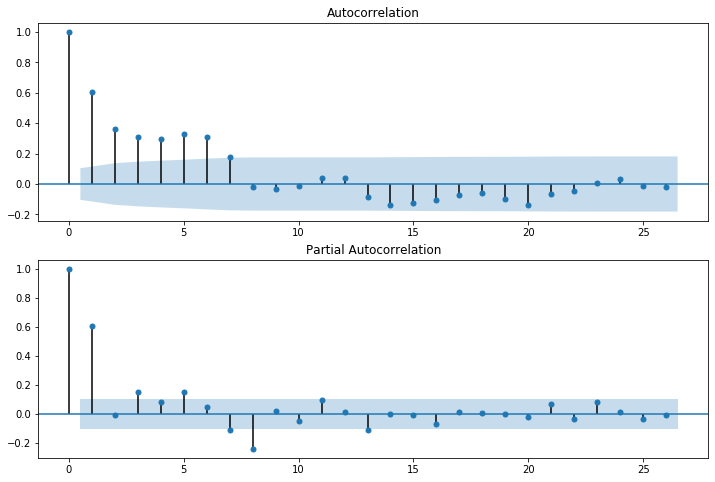

In [16]:
#Cek ACF dan PACF untuk menentukan orde p dan q ARMA
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["Inflasi"], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["Inflasi"], ax=ax2)

In [17]:
!pip install pmdarima

In [18]:
#Estimasi parameter ARMA
import pmdarima
model_arma=pmdarima.auto_arima(data["Inflasi"],start_p=0, start_q=0, max_p=5, max_q=6,seasonal=False, stationary=True, information_criterion='aic')
model_arma.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sari

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  355
Model:               SARIMAX(3, 0, 5)   Log Likelihood                -484.850
Date:                Wed, 12 Aug 2020   AIC                            989.699
Time:                        14:42:20   BIC                           1028.421
Sample:                             0   HQIC                          1005.104
                                - 355                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1814      0.096      1.896      0.058      -0.006       0.369
ar.L1          1.5807      0.143     11.066      0.000       1.301       1.861
ar.L2         -1.4552      0.183     -7.931      0.000      -1.815      -1.096
ar.L3          0.6226      0.125      4.978      0.000       0.377       0.868
ma.L1         -1.0331      0.151     -6.862      0.000      -1.328      -0.738
ma.L2          0.8317      0.141      5.881      0.000       0.555       1.109
ma.L3          0.0540      0.152      0.355      0.722      -0.244       0.352
ma.L4         -0.2119      0.119     -1.777      0.076      -0.446       0.022
ma.L5          0.2120      0.096      2.197      0.028       0.023       0.401
sigma2         0.8963      0.024     37.812      0.000       0.850       0.943
===================================================================================
Ljung-Box (Q):                       26.92   Jarque-Bera (JB):             17871.18
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             4.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#Estimasi parameter ARMA
model_arma2=pmdarima.auto_arima(data["Inflasi"],start_p=0, start_q=0, max_p=5, max_q=2,seasonal=False, stationary=True, information_criterion='aic')
model_arma2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sari

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  355
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -490.163
Date:                Wed, 12 Aug 2020   AIC                            994.326
Time:                        14:54:31   BIC                           1021.431
Sample:                             0   HQIC                          1005.109
                                - 355                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1274      0.054      2.348      0.019       0.021       0.234
ar.L1          1.7295      0.099     17.430      0.000       1.535       1.924
ar.L2         -1.4836      0.121    -12.258      0.000      -1.721      -1.246
ar.L3          0.5776      0.040     14.372      0.000       0.499       0.656
ma.L1         -1.1625      0.106    -10.947      0.000      -1.371      -0.954
ma.L2          0.7490      0.098      7.628      0.000       0.557       0.941
sigma2         0.9241      0.024     38.916      0.000       0.878       0.971
===================================================================================
Ljung-Box (Q):                       43.51   Jarque-Bera (JB):             15636.11
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             3.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

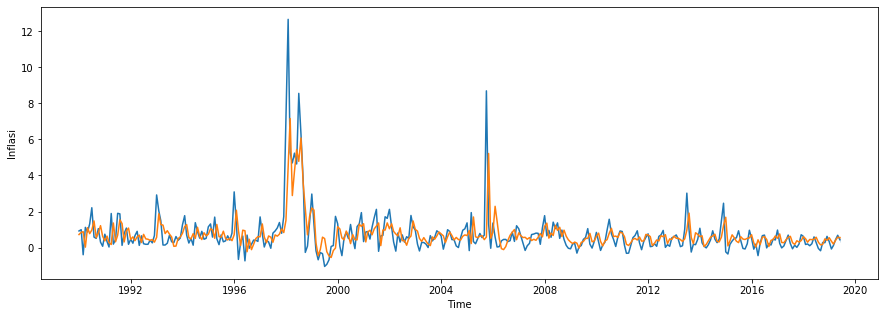

In [20]:
#Membandingkan Hasil Prediksi dan Data asli
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["Inflasi"])
sns.lineplot(x=data["Time"],y=model_arma2.predict_in_sample())

In [21]:
#Evaluasi dengan MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(data["Inflasi"],model_arma2.predict_in_sample())

0.9249325558255946

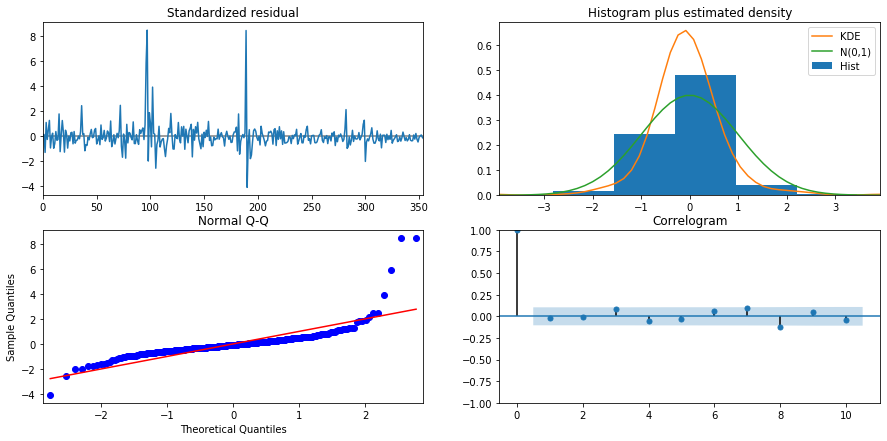

In [22]:
#Check diagnostic model
model_arma2.plot_diagnostics(figsize=(15,7))
plt.show()

In [23]:
#Forecast data
pred_arma=model_arma2.predict(12)

In [25]:
#Hasil Forecast
pd.DataFrame({"Prediksi":pred_arma})

,Prediksi
0,0.389598
1,0.530554
2,0.645975
3,0.682437
4,0.655667
5,0.621935
6,0.624374
7,0.663176
8,0.707182
9,0.727131


Data Dengan Tren

Load Dataset

In [176]:
#import dataset
# Uncomment the following lines if you haven't mount to your drive. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# loading data with pandas read_csv
data = pd.read_csv('E:/import.csv',sep=";")

In [27]:
data

,Time,Impor(Miliar Dollar)
0,01-1990,1314.8
1,02-1990,1492.2
2,03-1990,1694.3
3,04-1990,1067.6
4,05-1990,1796.1
...,...,...
349,02-2019,12226.0
350,03-2019,13451.1
351,04-2019,15399.2
352,05-2019,14606.7


Cek Data Type

In [28]:
data.dtypes

Time                     object
Impor(Miliar Dollar)    float64
dtype: object

In [29]:
#Merubah tipe data
data["Time"]=pd.to_datetime(data["Time"],format="%m-%Y")

In [30]:
data.dtypes

Time                    datetime64[ns]
Impor(Miliar Dollar)           float64
dtype: object

Membuat plot time series

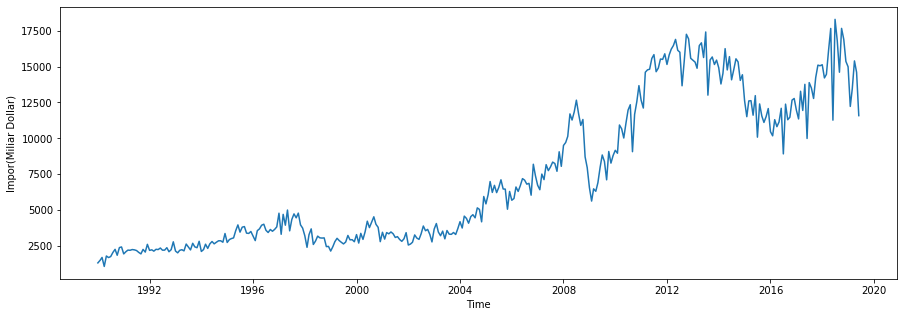

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["Impor(Miliar Dollar)"])

Cek stasioneritas data dengan ADF Test

In [32]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['Impor(Miliar Dollar)'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -0.797141
p-value                          0.819961
#Lags Used                      12.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


Double Exponential Smoothing (Holt)

In [33]:
from statsmodels.tsa.api import Holt
#Holt Linear Tren dengan alpha=0.8 dan gamma=0.2
fit1 = Holt(data["Impor(Miliar Dollar)"]).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

#Holt Linear dengan alpha dan gamma dioptimasi
fit2 = Holt(data["Impor(Miliar Dollar)"]).fit(optimized=True)
fcast2 = fit2.forecast(12).rename("Holt's linear trend optimize")


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [38]:
fit2.params

{'smoothing_level': 0.46642521355894423,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1247.222871309969,
 'initial_slope': 33.735749804503136,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

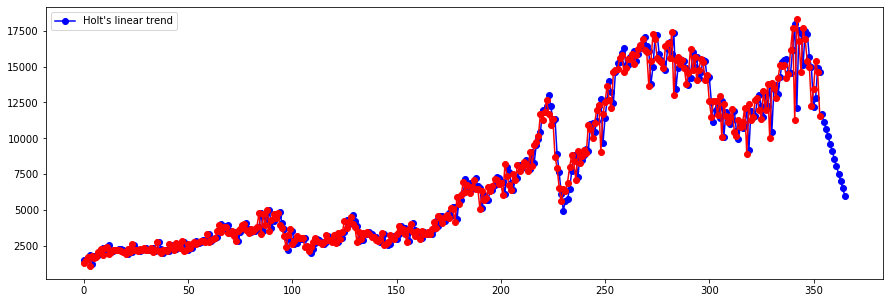

In [34]:
#Membandingkan Data asli dengan Holt linear trend
plt.figure(figsize=(15,5))
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')


data['Impor(Miliar Dollar)'].plot(marker='o', color='red')
plt.show()

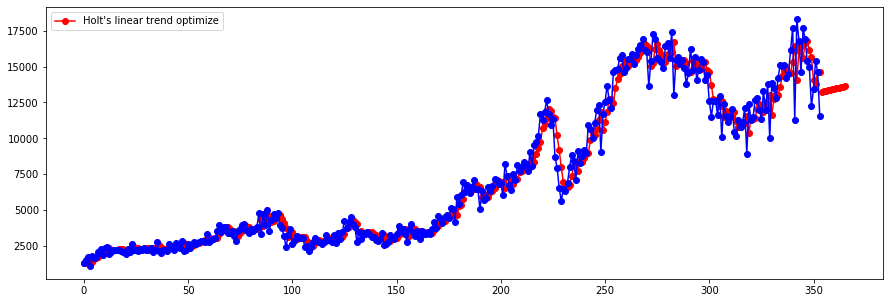

In [35]:
#Membandingkan Data asli dengan Holt linear trend optimize
plt.figure(figsize=(15,5))
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

data['Impor(Miliar Dollar)'].plot(marker='o', color='blue')
plt.show()

In [36]:
#Evaluasi dengan MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(data["Impor(Miliar Dollar)"],fit1.fittedvalues))
print(mean_squared_error(data["Impor(Miliar Dollar)"],fit2.fittedvalues))

1153969.016634303
882671.5296683916


ARIMA

Differencing Data

In [39]:
#Differencing lag 1
data["diff"]=data["Impor(Miliar Dollar)"].diff(periods=1)

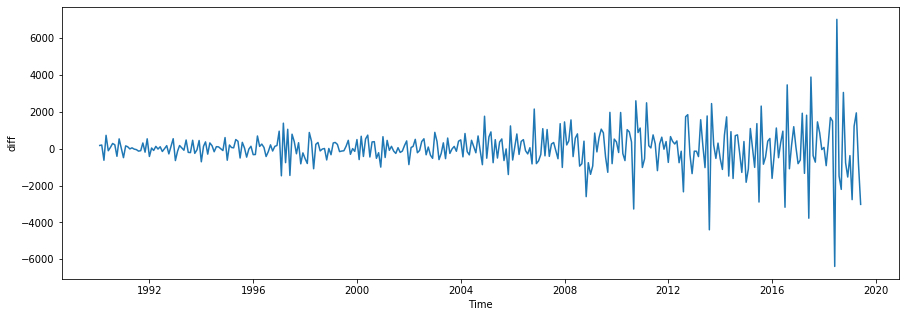

In [40]:
#Plot hasil differencing
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["diff"])

In [41]:
#Test stasioneritas dengan ADF test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['diff'].drop(0,axis=0))
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -5.027360
p-value                          0.000020
#Lags Used                      11.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


In [42]:
data

,Time,Impor(Miliar Dollar),diff
0,1990-01-01,1314.8,NaN
1,1990-02-01,1492.2,177.4
2,1990-03-01,1694.3,202.1
3,1990-04-01,1067.6,-626.7
4,1990-05-01,1796.1,728.5
...,...,...,...
349,2019-02-01,12226.0,-2765.4
350,2019-03-01,13451.1,1225.1
351,2019-04-01,15399.2,1948.1
352,2019-05-01,14606.7,-792.5


ACF dan PACF

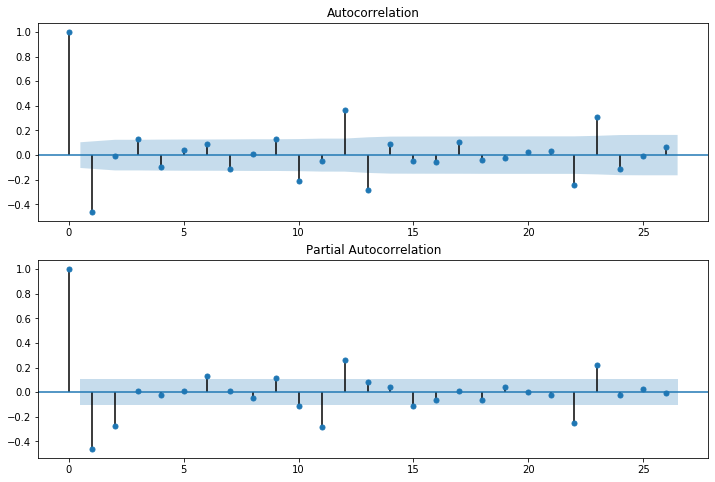

In [43]:
#ACF dan PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["diff"].drop(0,axis=0), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["diff"].drop(0,axis=0), ax=ax2)

In [44]:
#estimasi model ARIMA
model_arima=pmdarima.auto_arima(data["Impor(Miliar Dollar)"],start_p=0, start_q=0,d=1, max_p=6, max_q=3,seasonal=False, stationary=False, information_criterion='aic')
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  354
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -2913.177
Date:                Wed, 12 Aug 2020   AIC                           5832.353
Time:                        15:39:35   BIC                           5843.953
Sample:                             0   HQIC                          5836.969
                                - 354                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6031      0.030    -19.908      0.000      -0.662      -0.544
ar.L2         -0.2888      0.037     -7.794      0.000      -0.361      -0.216
sigma2      8.654e+05   3.95e+04     21.905      0.000    7.88e+05    9.43e+05
===================================================================================
Ljung-Box (Q):                      168.65   Jarque-Bera (JB):               401.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.04   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

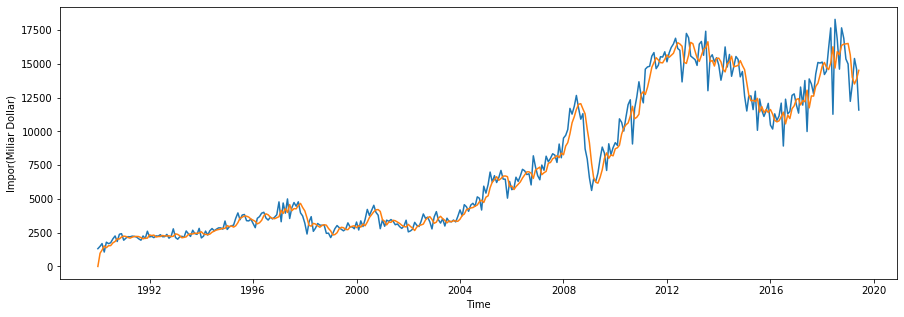

In [45]:
#membandingkan nilai aktual dengan hasil prediksi
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["Impor(Miliar Dollar)"])
sns.lineplot(x=data["Time"],y=model_arima.predict_in_sample())

In [46]:
#Evaluasi dengan MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(data["Impor(Miliar Dollar)"],model_arima.predict_in_sample())

864306.8318194007

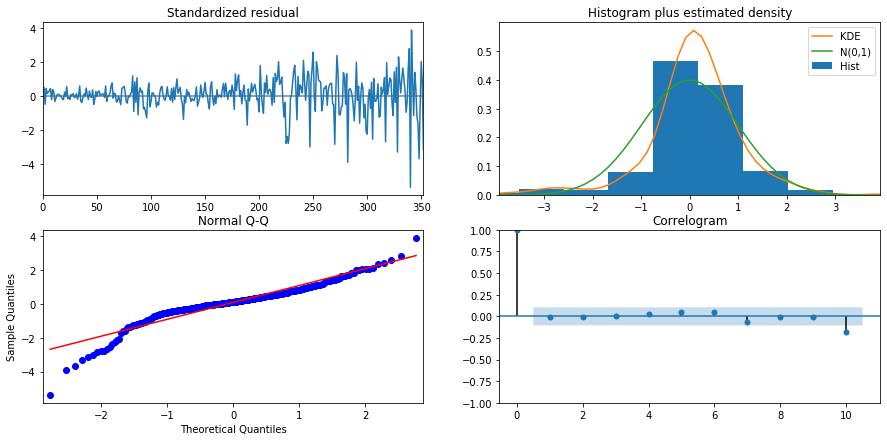

In [47]:
#Diagnostic check model
model_arima.plot_diagnostics(figsize=(15,7))
plt.show()

In [48]:
#Forecast
pred_arima=model_arima.predict(12)

In [49]:
#Hasil Prediksi
pd.DataFrame({"Prediksi":pred_arima})

,Prediksi
0,13635.690760
1,13271.192745
2,12898.472438
3,13228.509457
4,13137.105703
5,13096.921737
6,13147.551017
7,13128.622002
8,13125.417017
9,13132.816136


Data Musiman

SARIMA

In [263]:
#import dataset
# Uncomment the following lines if you haven't mount to your drive. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# loading data with pandas read_csv
data = pd.read_csv('E:/Produksi_Susu.csv',sep=";")

In [51]:
data

,Time,Produksi
0,01-1962,589
1,02-1962,561
2,03-1962,640
3,04-1962,656
4,05-1962,727
...,...,...
163,08-1975,858
164,09-1975,817
165,10-1975,827
166,11-1975,797


In [52]:
data.dtypes

Time        object
Produksi     int64
dtype: object

In [53]:
data["Time"]=pd.to_datetime(data["Time"],format="%m-%Y")

In [54]:
data.dtypes

Time        datetime64[ns]
Produksi             int64
dtype: object

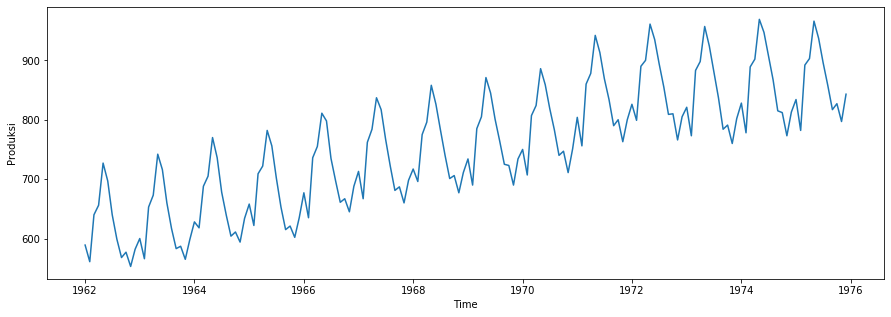

In [55]:
#Plot data
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["Produksi"])

In [56]:
#Uji stasioneritas dengan ADF test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['Produksi'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -1.303812
p-value                          0.627427
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


Differencing Data

In [57]:
#Differencing data lag 1
data["diff"]=data["Produksi"].diff(periods=1)

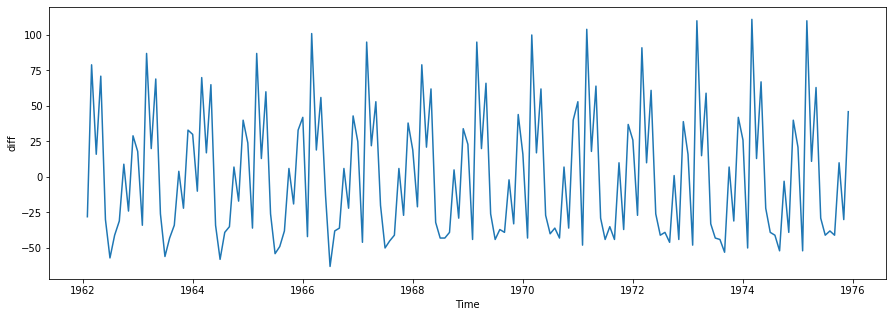

In [58]:
#Plot hasil differencing
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["diff"])

In [59]:
#Uji stasioneritas dengan ADF test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['diff'].drop(0,axis=0))
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -3.054996
p-value                          0.030068
#Lags Used                      14.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


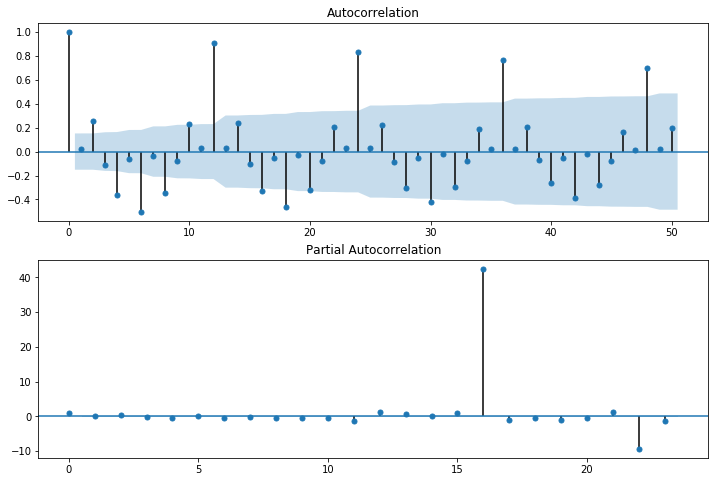

In [60]:
#ACF dan PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["diff"].drop(0,axis=0),lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["diff"].drop(0,axis=0), ax=ax2)

In [61]:
#Differencing musiman lag 12
data["diff_seasonal"]=data["diff"].diff(periods=12)

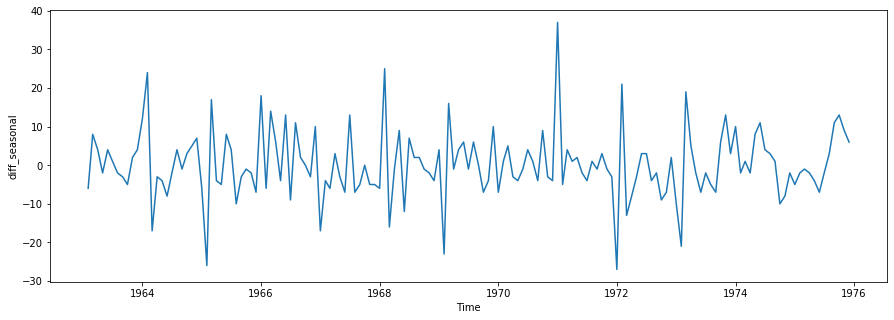

In [62]:
#Plot hasil differencing
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["diff_seasonal"])

In [298]:
data.head(20)

,Time,Produksi,diff,diff_seasonal
0,1962-01-01,589,NaN,NaN
1,1962-02-01,561,-28.0,NaN
2,1962-03-01,640,79.0,NaN
3,1962-04-01,656,16.0,NaN
4,1962-05-01,727,71.0,NaN
5,1962-06-01,697,-30.0,NaN
6,1962-07-01,640,-57.0,NaN
7,1962-08-01,599,-41.0,NaN
8,1962-09-01,568,-31.0,NaN
9,1962-10-01,577,9.0,NaN


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


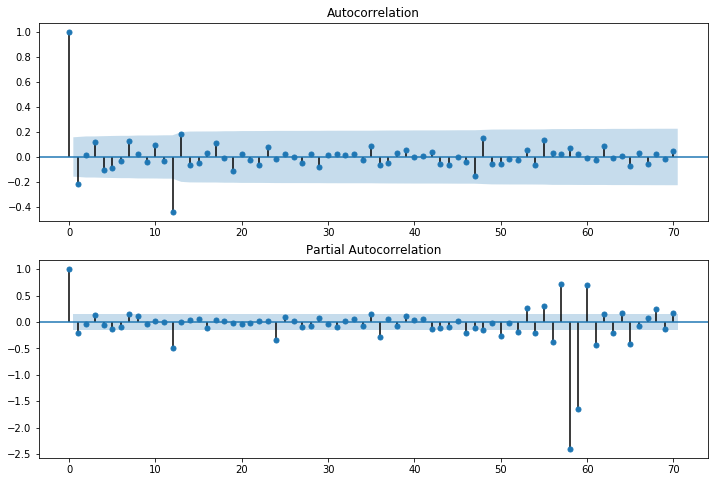

In [63]:
#ACF dan PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["diff_seasonal"].drop([0,1,2,3,4,5,6,7,8,9,10,11,12],axis=0),lags=70, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["diff_seasonal"].drop([0,1,2,3,4,5,6,7,8,9,10,11,12],axis=0),lags=70, ax=ax2)

In [64]:
#Estimasi model SARIMA
model_Sarima=pmdarima.auto_arima(data["Produksi"],start_p=0, start_q=0,d=1,D=1, max_p=5, max_q=6,max_P=6,seasonal=True,m=12, stationary=False, information_criterion='aic')
model_Sarima.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Wed, 12 Aug 2020   AIC                           1066.207
Time:                                      16:05:37   BIC                           1075.337
Sample:                                           0   HQIC                          1069.916
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (Q):                       22.06   Jarque-Bera (JB):                35.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

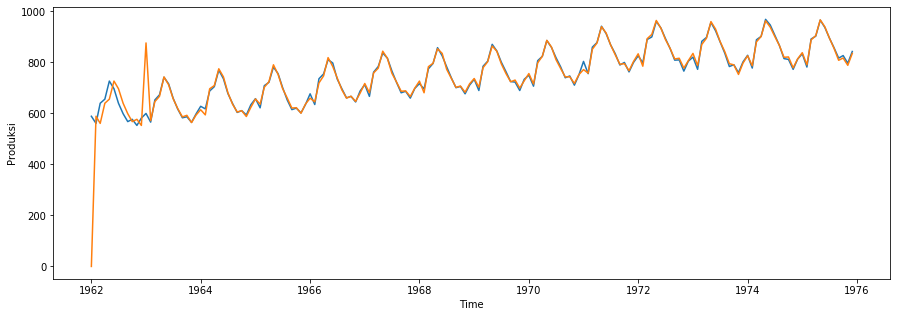

In [65]:
#Membandingkan data aktual dengan data prediksi
plt.figure(figsize=(15,5))
sns.lineplot(x=data["Time"],y=data["Produksi"])
sns.lineplot(x=data["Time"],y=model_Sarima.predict_in_sample())

In [66]:
#Evaluasi dengan MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(data["Produksi"],model_Sarima.predict_in_sample())

2692.7952568803885

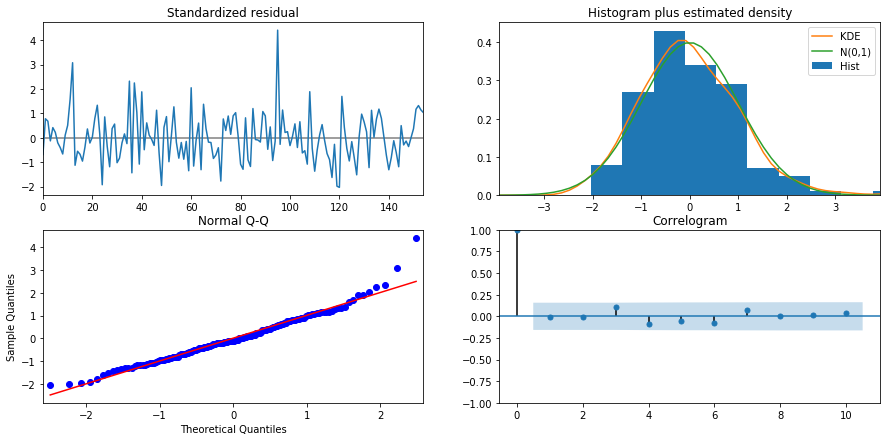

In [67]:
#Diagnostic check model
model_Sarima.plot_diagnostics(figsize=(15,7))
plt.show()

In [68]:
#Forecast
pred_Sarima=model_Sarima.predict(12)

In [69]:
#Hasil Forecast
pd.DataFrame({"Prediksi":pred_Sarima})

,Prediksi
0,865.349740
1,818.387707
2,925.019489
3,938.096591
4,1001.238547
5,973.830260
6,932.477681
7,892.889158
8,846.994443
9,852.166204
